## Import

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploring data

### Read cleaned data from file

In [65]:
df = pd.read_csv('../data/processed/data.csv', index_col=0)
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
1438,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",2021,1
5689,Movie,Reggie Watts: Spatial,Benjamin Dickinson,Reggie Watts,United States,2016-12-06,2016,TV-MA,62 min,"Music & Musicals, Stand-Up Comedy",2016,12
2770,Movie,True: Wuzzle Wegg Day,"Todd Kauffman, Mark Thornton","Michela Luci, Jamie Watson, Eric Peterson, Ann...",Canada,2020-03-27,2020,TV-Y,24 min,Children & Family Movies,2020,3
6200,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,2018-12-25,2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",2018,12
1264,Movie,Our Idiot Brother,Jesse Peretz,"Paul Rudd, Elizabeth Banks, Zooey Deschanel, E...",United States,2021-02-26,2011,R,90 min,"Comedies, Dramas, Independent Movies",2021,2


### Question 1: What is the distribution of movie and tv show on Netflix?

In [66]:
x=df['type'].value_counts()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

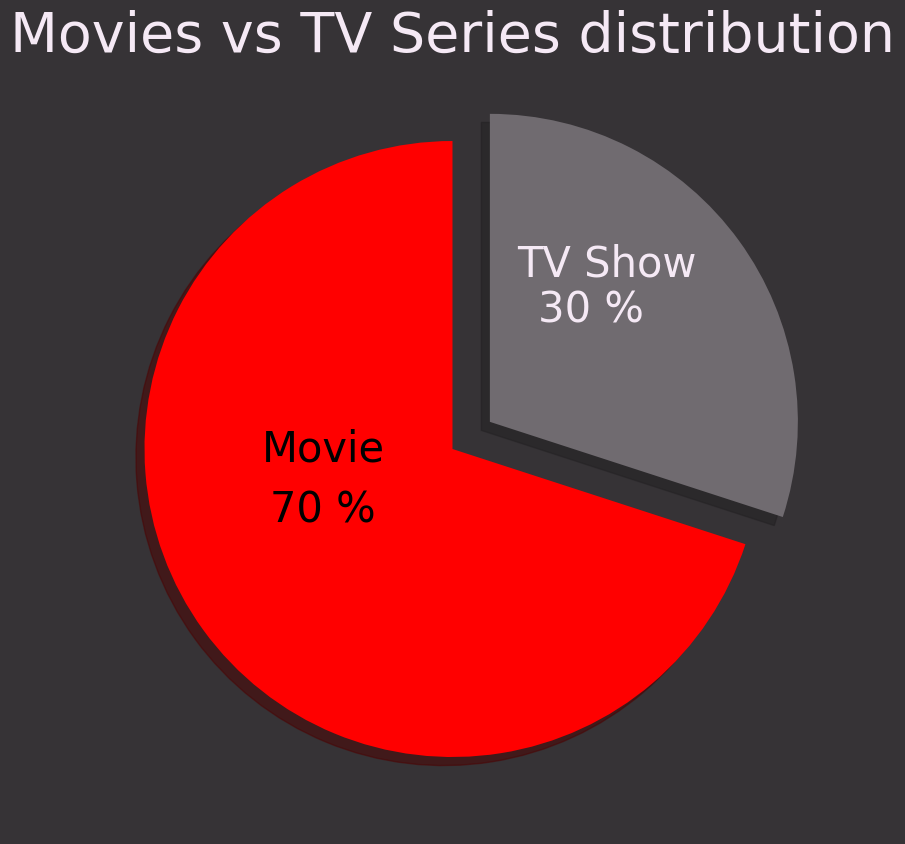

In [124]:
values = mf_ratio.values.flatten().tolist()
labels = mf_ratio.columns.tolist()
explode = (0, 0.15)
colors = ['#E50914', '#221f1f']  # Netflix red and dark color for the slices
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
plt.pie(x=values, shadow=True, explode=explode, colors =['red','#706B70'], startangle=90, )
plt.title('Movies vs TV Series distribution', color='#F5E9F5', fontsize=40)
ax.text(s=labels[0],x=-0.42,y=0,fontsize=30,va='center',ha='center')
ax.text(s=f'{values[0] * 100:.0f} %',x=-0.42,y=-0.2,fontsize=30,va='center',ha='center')

ax.text(s=labels[1],x=0.5,y=0.6, fontsize=30,color='#F5E9F5',va='center',ha='center')
ax.text(s=f'{values[1] * 100:.0f} %',x=0.45,y=0.45,fontsize=30,va='center',ha='center', color='#F5E9F5')
# Display the pie chart
plt.show()

### Question 2: